# Упражнение 3. Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы
( при отсутствии доступа к Порталу https://rosstat.gov.ru/). Выявить показатели в наборе данных (на основании упражнения 1.1.):



Дороги и транспорт-2. Железнодорожные вокзалы Москвы https://data.mos.ru/opendata/62201?pageSize=10&pageIndex=0

In [15]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint
import requests

# Для выполнения операций с регулярными выражениями
import re

import matplotlib.pyplot as plt

In [3]:
api_url = 'https://apidata.mos.ru/v1/datasets/62743/features?api_key=fe745d88-80ac-4772-b39e-dd4f422b01e2'
response = requests.get(api_url)
json_page = response.json()
print(json_page)

{'features': [{'geometry': None, 'properties': {'datasetId': 62743, 'attributes': {'is_deleted': 0, 'NameOfStation': 'Митино', 'Line': 'Арбатско-Покровская линия', 'Year': 2021, 'Quarter': 'I квартал', 'IncomingPassengers': 1913498, 'OutgoingPassengers': 1829031, 'global_id': 1138975996}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 20}, 'type': 'Feature'}, {'geometry': None, 'properties': {'datasetId': 62743, 'attributes': {'is_deleted': 0, 'NameOfStation': 'Волоколамская', 'Line': 'Арбатско-Покровская линия', 'Year': 2021, 'Quarter': 'I квартал', 'IncomingPassengers': 1236714, 'OutgoingPassengers': 1222309, 'global_id': 1138975997}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 20}, 'type': 'Feature'}, {'geometry': None, 'properties': {'datasetId': 62743, 'attributes': {'is_deleted': 0, 'NameOfStation': 'Строгино', 'Line': 'Арбатско-Покровская линия', 'Year': 2021, 'Quarter': 'I квартал', 'IncomingPassengers': 1938816, 'OutgoingPassengers': 1903731, 'global_id': 11389759

Обрабатываем данные с помощью `JSON`:

In [4]:
if response.status_code == 200:
   json_page = json.loads(response.text)

Получите URL-адрес:

In [5]:
print(f"URL: \n\t {response.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/62743/features?api_key=fe745d88-80ac-4772-b39e-dd4f422b01e2


Определите тип контента:

In [6]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json


Обработайте данные с помощью JSON:

In [7]:
if response.status_code == 200:
   json_page = json.loads(response.text)

Посмотреть на ключи:

In [8]:
for x in json_page:
    print(x)

features
type


Распечатать ключи и значения:

In [9]:
for x in json_page:
    print(f"{x} --> {json_page[x]} \n")

features --> [{'geometry': None, 'properties': {'datasetId': 62743, 'attributes': {'is_deleted': 0, 'NameOfStation': 'Митино', 'Line': 'Арбатско-Покровская линия', 'Year': 2021, 'Quarter': 'I квартал', 'IncomingPassengers': 1913498, 'OutgoingPassengers': 1829031, 'global_id': 1138975996}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 20}, 'type': 'Feature'}, {'geometry': None, 'properties': {'datasetId': 62743, 'attributes': {'is_deleted': 0, 'NameOfStation': 'Волоколамская', 'Line': 'Арбатско-Покровская линия', 'Year': 2021, 'Quarter': 'I квартал', 'IncomingPassengers': 1236714, 'OutgoingPassengers': 1222309, 'global_id': 1138975997}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 20}, 'type': 'Feature'}, {'geometry': None, 'properties': {'datasetId': 62743, 'attributes': {'is_deleted': 0, 'NameOfStation': 'Строгино', 'Line': 'Арбатско-Покровская линия', 'Year': 2021, 'Quarter': 'I квартал', 'IncomingPassengers': 1938816, 'OutgoingPassengers': 1903731, 'global_id': 11389759

In [10]:
pprint.pprint(json_page)

{'features': [{'geometry': None,
               'properties': {'attributes': {'IncomingPassengers': 1913498,
                                             'Line': 'Арбатско-Покровская '
                                                     'линия',
                                             'NameOfStation': 'Митино',
                                             'OutgoingPassengers': 1829031,
                                             'Quarter': 'I квартал',
                                             'Year': 2021,
                                             'global_id': 1138975996,
                                             'is_deleted': 0},
                              'datasetId': 62743,
                              'releaseNumber': 20,
                              'rowId': None,
                              'versionNumber': 1},
               'type': 'Feature'},
              {'geometry': None,
               'properties': {'attributes': {'IncomingPassengers': 1236714,
   

In [16]:
data2 = {'features': []}

# Извлеките данные из JSON
for feature in json_page['features']:
    geometry = feature['geometry']
    properties = feature['properties']['attributes']
    
    # Добавьте данные в словарь
    data2['features'].append({
        'NameOfStation': properties['NameOfStation'],
        'Line': properties['Line'],
        'Year': properties['Year'],
        'IncomingPassengers': properties['IncomingPassengers'],
        'OutgoingPassengers': properties['OutgoingPassengers']
    })

# Создайте датафрейм из словаря
df = pd.DataFrame(data2['features'])

# Выведите первые несколько строк датафрейма
df.head()

,NameOfStation,Line,Year,IncomingPassengers,OutgoingPassengers
0,Митино,Арбатско-Покровская линия,2021,1913498,1829031
1,Волоколамская,Арбатско-Покровская линия,2021,1236714,1222309
2,Строгино,Арбатско-Покровская линия,2021,1938816,1903731
3,Крылатское,Арбатско-Покровская линия,2021,1849616,1818208
4,Площадь Революции,Арбатско-Покровская линия,2021,2324687,2319343


In [31]:
station_entries = df.groupby('Line')['IncomingPassengers'].sum().sort_values(ascending=False)

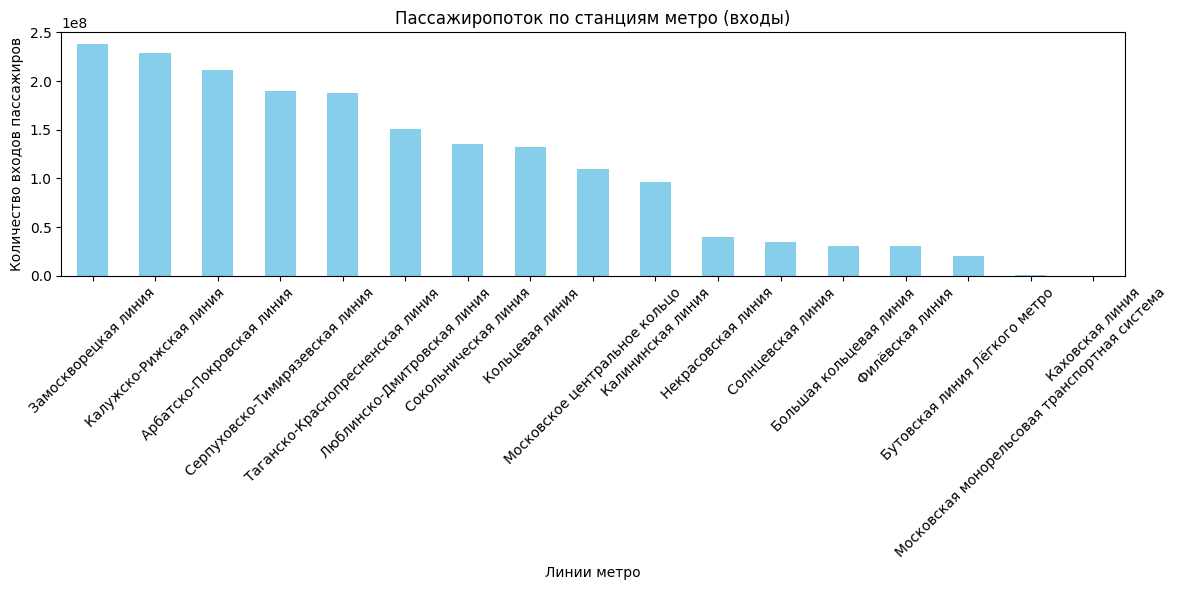

In [32]:
plt.figure(figsize=(12, 6))
station_entries.plot(kind='bar', color='skyblue')
plt.xlabel('Линии метро')
plt.ylabel('Количество входов пассажиров')
plt.title('Пассажиропоток по станциям метро (входы)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
station_entries1 = df.groupby('Line')['OutgoingPassengers'].sum().sort_values(ascending=False)

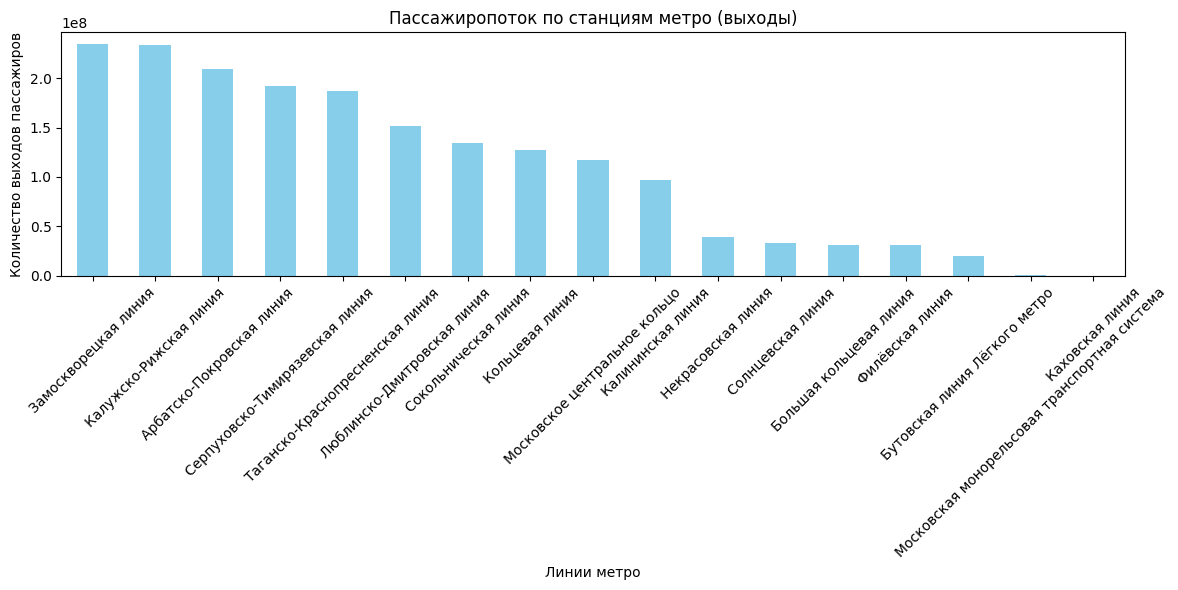

In [34]:
plt.figure(figsize=(12, 6))
station_entries1.plot(kind='bar', color='skyblue')
plt.xlabel('Линии метро')
plt.ylabel('Количество выходов пассажиров')
plt.title('Пассажиропоток по станциям метро (выходы)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Box Plot (Ящик с усами):** Для анализа распределения входящих и исходящих пассажиров на станциях метро по линиям.

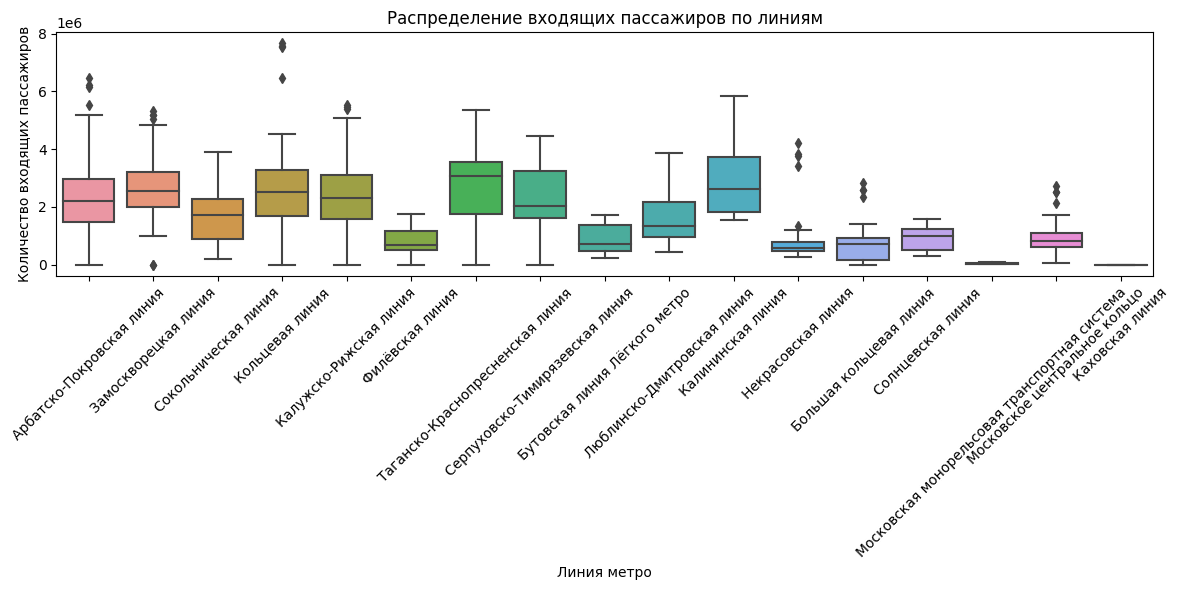

In [36]:
import seaborn as sns

# Предположим, что df - это ваш DataFrame с данными о пассажиропотоке
plt.figure(figsize=(12, 6))
sns.boxplot(x='Line', y='IncomingPassengers', data=df)
plt.xlabel('Линия метро')
plt.ylabel('Количество входящих пассажиров')
plt.title('Распределение входящих пассажиров по линиям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Scatter Plot (Точечная диаграмма):** Для исследования корреляции между входящими и исходящими пассажирами на станциях.

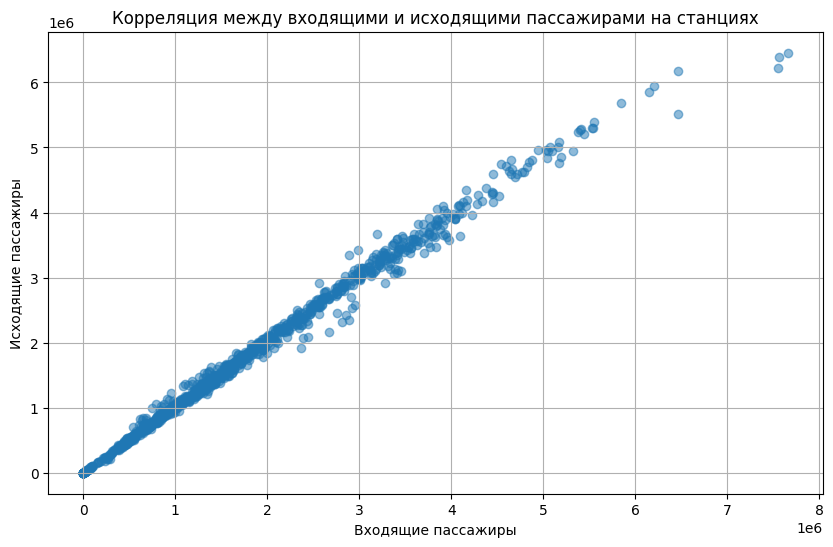

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df['IncomingPassengers'], df['OutgoingPassengers'], alpha=0.5)
plt.xlabel('Входящие пассажиры')
plt.ylabel('Исходящие пассажиры')
plt.title('Корреляция между входящими и исходящими пассажирами на станциях')
plt.grid(True)
plt.show()